In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the Excel file
xls = pd.ExcelFile('https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/ASCDataset/Australian%20Skills%20Classification%20-%20December%202023.xlsx')

# Dictionary to hold all DataFrames, one for each sheet
sheets_dict = {}

for sheet_name in xls.sheet_names:
    # Load each sheet into a DataFrame
    sheets_dict[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

xls.sheet_names

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['Index',
 'Glossary',
 'Occupation descriptions',
 'Core competency descriptions',
 'Specialist tasks hierarchy',
 'Tech tools heirarchy',
 'Core competencies',
 'Specialist tasks data',
 'Technology tools',
 'Appendix - tech tool examples',
 'Appendix - common tech tools']

In [ ]:
for sheet_name in xls.sheet_names:
    print(f"Columns in sheet '{sheet_name}':")
    print(sheets_dict[sheet_name].columns.tolist())
    print("-" * 20)

Columns in sheet 'Index':
['Unnamed: 0', 'Unnamed: 1']
--------------------
Columns in sheet 'Glossary':
['Glossary of key terms', 'Unnamed: 1']
--------------------
Columns in sheet 'Occupation descriptions':
['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
--------------------
Columns in sheet 'Core competency descriptions':
['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
--------------------
Columns in sheet 'Specialist tasks hierarchy':
['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
--------------------
Columns in sheet 'Tech tools heirarchy':
['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
--------------------
Columns in sheet 'Core competencies':
['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Pro

# 1. Basic Data Understanding

## 1.1 Load and Inspect Data

In [ ]:
# Display the shape and check for missing values in key sheets
occupation_desc = sheets_dict['Occupation descriptions']
core_competencies = sheets_dict['Core competencies']
specialist_tasks_data = sheets_dict['Specialist tasks data']
tech_tool_count = sheets_dict['Technology tools']



# Checking shapes and missing data
print("Occupation Descriptions Shape:", occupation_desc.shape)
print("Missing Values in Occupation Descriptions:\n", occupation_desc.isnull().sum())

print("Core Competencies Shape:", tech_tool_count.shape)
print("Missing Values in Core Competencies:\n", core_competencies.isnull().sum())

print("Specialist Tasks Data Shape:", specialist_tasks_data.shape)
print("Missing Values in Specialist Tasks Data:\n", specialist_tasks_data.isnull().sum())

# Inspect first few rows to understand structure better
print("First few rows of Occupation Descriptions:\n", occupation_desc.head())
print("First few rows of Core Competencies:\n", core_competencies.head())
print("First few rows of Specialist Tasks Data:\n", specialist_tasks_data.head())
print("First few rows of Technology tools:\n", tech_tool_count.head())

Occupation Descriptions Shape: (1650, 5)
Missing Values in Occupation Descriptions:
 Occupation Type          0
ANZSCO Code              0
Sub-Profile Code      1178
ANZSCO Title             0
ANZSCO Description       0
dtype: int64
Core Competencies Shape: (5761, 6)
Missing Values in Core Competencies:
 Occupation Type          0
ANZSCO Code              0
Sub-Profile Code     11030
ANZSCO Title             0
Core Competency          0
Score                    0
Proficiency Level        0
Anchor Value             0
dtype: int64
Specialist Tasks Data Shape: (30450, 12)
Missing Values in Specialist Tasks Data:
 Occupation Type                    0
ANZSCO Code                        0
Sub-Profile Code               23934
ANZSCO Title                       0
Specialist Task                    0
% of time spent on task         6516
Emerging/\nTrending Flag       29048
Specialist Cluster                 0
 % of time spent on cluster     6516
Cluster Family                     0
% of time sp

In [ ]:
tech_tool_count.head()

,Occupation Type,ANZSCO Code,Sub-Profile Code,ANZSCO Title,Technology Tool,Emerging/Trending Flag
0,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Accounting and financial management systems,NaN
1,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Audio/video conferencing software,NaN
2,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Business intelligence and decision support sof...,NaN
3,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Flow chart and diagram software,NaN
4,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Human resources software,NaN


## 1.2 Descriptive Statistics

In [ ]:
# Count unique skills, job roles, and industries
unique_skills = core_competencies['Core Competency'].nunique()
unique_job_roles = occupation_desc['ANZSCO Title'].nunique()
unique_industries = occupation_desc['Occupation Type'].nunique()

print(f"Number of Unique Skills: {unique_skills}")
print(f"Number of Unique Job Roles: {unique_job_roles}")
print(f"Number of Unique Industries: {unique_industries}")

# Frequency of job titles
job_title_freq = occupation_desc['ANZSCO Title'].value_counts()
print("Frequency of Unique Job Titles:\n", job_title_freq.head(10))  # Top 10 most common job titles


Number of Unique Skills: 10
Number of Unique Job Roles: 1650
Number of Unique Industries: 5
Frequency of Unique Job Titles:
 ANZSCO Title
Chief Executives and Managing Directors        1
Wood Model Maker                               1
Camera Operator (Film, Television or Video)    1
Broadcast Transmitter Operator                 1
Jeweller                                       1
Library Technician                             1
Gallery or Museum Technician                   1
Power Generation Plant Operator                1
Wind Turbine Technician                        1
Gas or Petroleum Operator                      1
Name: count, dtype: int64


## 1.3 Handling Missing Data

In [ ]:
# Identify missing or incomplete entries
print("Missing Data in Occupation Descriptions:\n", occupation_desc.isnull().sum())
print("Missing Data in Core Competencies:\n", core_competencies.isnull().sum())
print("Missing Data in Specialist Tasks Data:\n", specialist_tasks_data.isnull().sum())

# Decision on handling missing values - Example: Fill with median or mode, or drop based on analysis
# If 'Score' column is numeric and has missing values, fill with median
if 'Score' in core_competencies.columns:
    median_score = core_competencies['Score'].median()
    core_competencies['Score'].fillna(median_score, inplace=True)

# If essential text fields are missing, consider dropping or filling with a placeholder
occupation_desc['ANZSCO Description'].fillna("Description not available", inplace=True)

Missing Data in Occupation Descriptions:
 Occupation Type          0
ANZSCO Code              0
Sub-Profile Code      1178
ANZSCO Title             0
ANZSCO Description       0
dtype: int64
Missing Data in Core Competencies:
 Occupation Type          0
ANZSCO Code              0
Sub-Profile Code     11030
ANZSCO Title             0
Core Competency          0
Score                    0
Proficiency Level        0
Anchor Value             0
dtype: int64
Missing Data in Specialist Tasks Data:
 Occupation Type                    0
ANZSCO Code                        0
Sub-Profile Code               23934
ANZSCO Title                       0
Specialist Task                    0
% of time spent on task         6516
Emerging/\nTrending Flag       29048
Specialist Cluster                 0
 % of time spent on cluster     6516
Cluster Family                     0
% of time spent on family       6516
Skills Statement                   0
dtype: int64


<ipython-input-6-b8035b0364ad>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  core_competencies['Score'].fillna(median_score, inplace=True)
<ipython-input-6-b8035b0364ad>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

# 2 Text Data Exploration

## 2.1 Word Frequency Analysis

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top 20 most common words: [('new', 1786), ('write', 1225), ('use', 1190), ('work', 1179), ('read', 1102), ('document', 1054), ('change', 869), ('coordinate', 784), ('sales', 783), ('prepare', 757), ('accurately', 706), ('results', 706), ('diverse', 691), ('questions', 660), ('plan', 659), ('instructions', 652), ('events', 644), ('sports', 644), ('management', 627), ('follow', 601)]


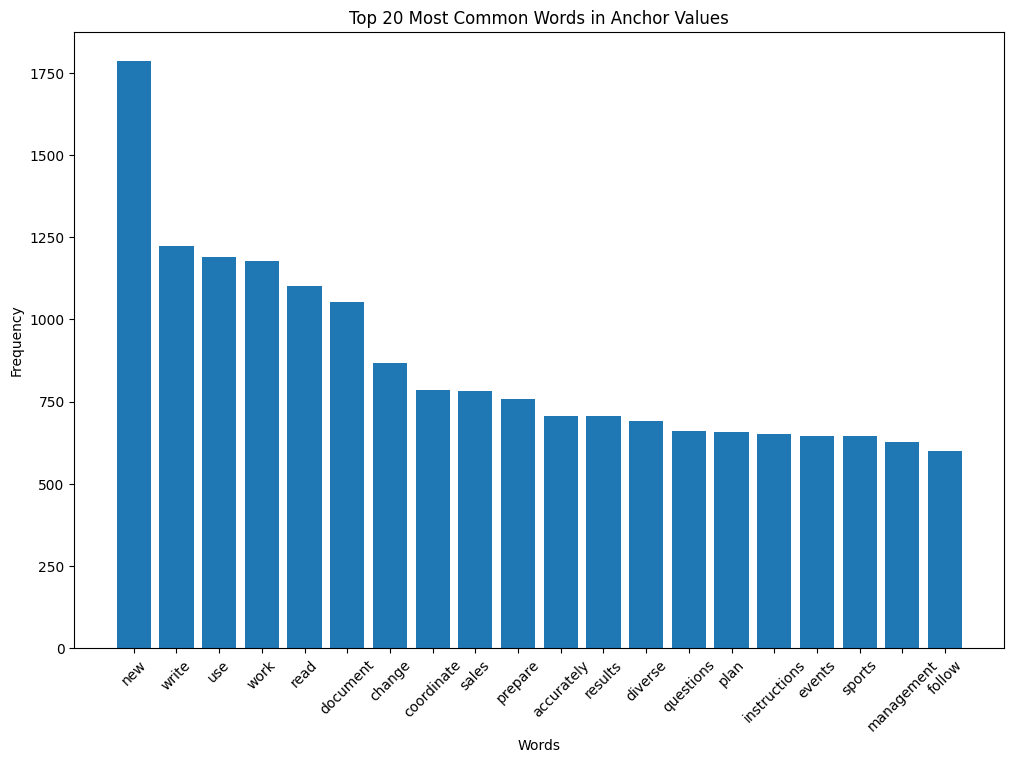

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the required punkt_tab resource
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
import pandas as pd # Import pandas

# Ensure nltk resources are downloaded
#nltk.download('punkt')
#nltk.download('stopwords')

# Load the Excel file (assuming it's in the same directory as your notebook)
xls = pd.ExcelFile('https://github.com/saifrahmania/Data36118/raw/refs/heads/main/Assignment1/Data/ASCDataset/Australian%20Skills%20Classification%20-%20December%202023.xlsx')
core_competencies = pd.read_excel(xls, sheet_name='Core competencies') # Load the 'Core competencies' sheet


# Prepare the text data from 'Anchor Value'
text_data = core_competencies['Anchor Value'].dropna().apply(lambda x: x.lower())

# Remove punctuation
text_data = text_data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_docs = text_data.apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words and word.isalpha()])

# Flatten list of words in documents
all_words = [word for tokens in tokenized_docs for word in tokens]

# Frequency distribution of words
word_freq = nltk.FreqDist(all_words)

# Top 20 most common words
top_words = word_freq.most_common(20)
print("Top 20 most common words:", top_words)

# Plotting the top 20 most common words
plt.figure(figsize=(12, 8))
plt.bar(*zip(*top_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Anchor Values')
plt.xticks(rotation=45)
plt.show()

## 2.2 N-Grams Analysis (Phrase Extraction)

In [ ]:
from nltk import bigrams, trigrams, FreqDist

# Generate bigrams
bigram_freq = FreqDist(bigrams(all_words))
top_bigrams = bigram_freq.most_common(20)
print("Top 20 most common bigrams:", top_bigrams)

# Generate trigrams
trigram_freq = FreqDist(trigrams(all_words))
top_trigrams = trigram_freq.most_common(20)
print("Top 20 most common trigrams:", top_trigrams)

Top 20 most common bigrams: [(('negotiate', 'price'), 402), (('price', 'sales'), 402), (('sales', 'terms'), 402), (('terms', 'prepare'), 402), (('prepare', 'contract'), 402), (('contract', 'house'), 402), (('machinery', 'safely'), 396), (('find', 'evidence'), 391), (('evidence', 'support'), 391), (('support', 'history'), 391), (('history', 'essay'), 391), (('essay', 'rare'), 391), (('rare', 'document'), 391), (('document', 'read'), 391), (('use', 'blood'), 389), (('blood', 'pressure'), 389), (('pressure', 'machine'), 389), (('machine', 'accurately'), 389), (('accurately', 'record'), 389), (('record', 'results'), 389)]
Top 20 most common trigrams: [(('negotiate', 'price', 'sales'), 402), (('price', 'sales', 'terms'), 402), (('sales', 'terms', 'prepare'), 402), (('terms', 'prepare', 'contract'), 402), (('prepare', 'contract', 'house'), 402), (('find', 'evidence', 'support'), 391), (('evidence', 'support', 'history'), 391), (('support', 'history', 'essay'), 391), (('history', 'essay', 'ra

## 2.3 Word Cloud Visualization

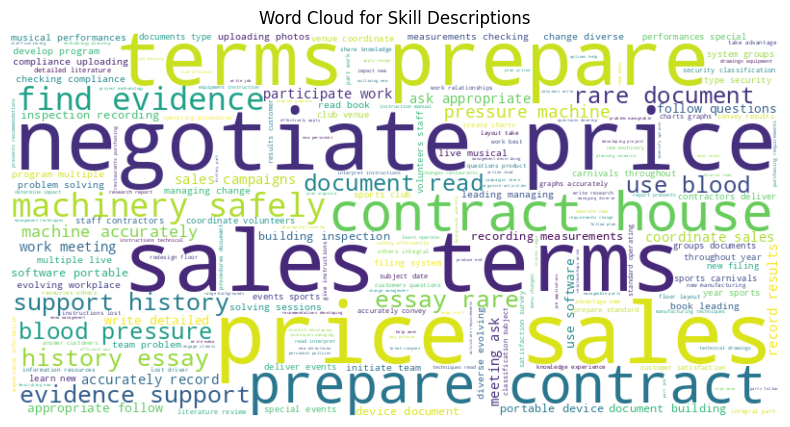

In [ ]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(all_words))

# Display the generated Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Skill Descriptions')
plt.show()

# Assuming there's a job category column to generate word clouds for different categories
# if 'Job Category' in core_competencies.columns:
#     categories = core_competencies['Job Category'].unique()
#     for category in categories:
#         category_text = ' '.join(core_competencies[core_competencies['Job Category'] == category]['Core Competency Description'])
#         wordcloud = WordCloud(width=800, height=400).generate(category_text)
#         plt.figure()
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis("off")
#         plt.title(f'Word Cloud for {category}')
#         plt.show()


## 2.4 Text Length Distribution

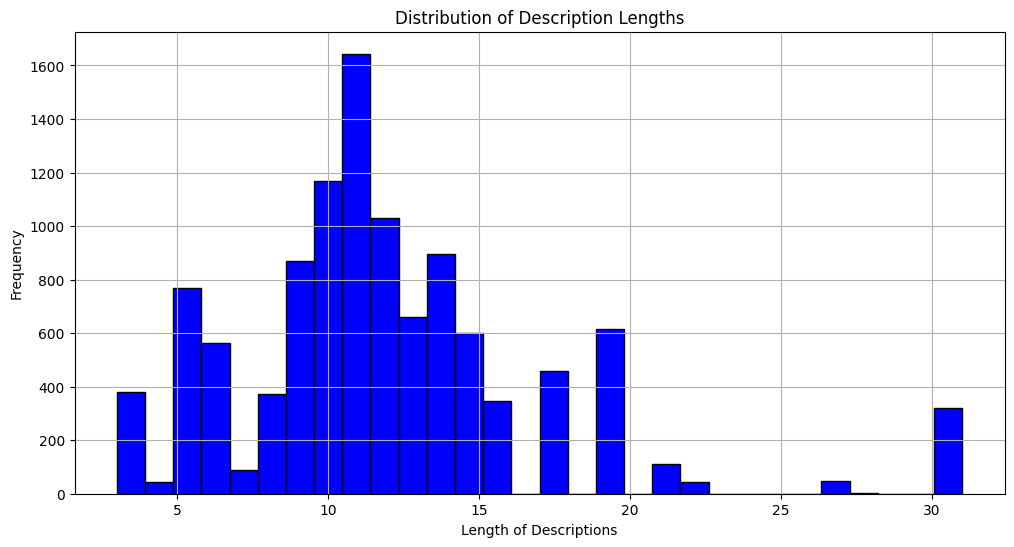

In [ ]:
# Calculate length of each description
desc_lengths = text_data.apply(lambda x: len(word_tokenize(x)))

# Visualize the distribution of description lengths
plt.figure(figsize=(12, 6))
plt.hist(desc_lengths, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Description Lengths')
plt.xlabel('Length of Descriptions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# 3. Skill Similarity and Clustering

## 3.1 TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'text_data' contains preprocessed text data
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # you can adjust the number of features
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Get feature names to use later for top word identification
feature_names = tfidf_vectorizer.get_feature_names_out()

# Example: Print top 10 words by TF-IDF score for the first document
top_n = 10
for i, row in enumerate(tfidf_matrix):
    top_features_indices = row.toarray()[0].argsort()[-top_n:][::-1]
    top_features = [feature_names[i] for i in top_features_indices]
    top_scores = row.toarray()[0][top_features_indices]
    print(f"Top {top_n} terms in document {i} by TF-IDF:")
    for feature, score in zip(top_features, top_scores):
        print(f"{feature} - {score}")
    if i == 0:  # remove or adjust this condition to display more examples
        break


Top 10 terms in document 0 by TF-IDF:
management - 0.6161734028322746
an - 0.5322870399420305
for - 0.5200260978954852
and - 0.25801880214325856
write - 0.0
how - 0.0
events - 0.0
evidence - 0.0
find - 0.0
follow - 0.0


## 3.2 Cosine Similarity (Skill Matching)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Example: print similarity scores for the first skill with others
print("Cosine similarity of the first document with others:")
print(cosine_sim_matrix[0])

# Optionally, identify skills that are closely related
# Assuming each row corresponds to a skill, find the top similar skills for the first skill
similar_indices = cosine_sim_matrix[0].argsort()[-3:-1]  # adjust thresholds and range as necessary
print("Skills most similar to the first skill:")
for index in similar_indices:
    if index != 0:  # Skip similarity with itself
        print(f"Skill {index} with a similarity score of {cosine_sim_matrix[0][index]}")


Cosine similarity of the first document with others:
[1.         0.17203789 0.0440862  ... 0.06739142 0.23467066 0.        ]
Skills most similar to the first skill:
Skill 2490 with a similarity score of 1.0
Skill 7910 with a similarity score of 1.0


## 3.3 Topic Modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Number of topics
n_topics = 5
lda = LDA(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, feature_names, 10)


Topic 0:
and with as instructions of to prepare an job use
Topic 1:
to of techniques find new the customer rare evidence essay
Topic 2:
write the new for on and of detailed memo management
Topic 3:
sales coordinate campaigns contract negotiate price then terms house for
Topic 4:
problem and complex into team follow plan in read safely


# 4. Comparative Analysis

## 4.1 Comparing Skill Categories

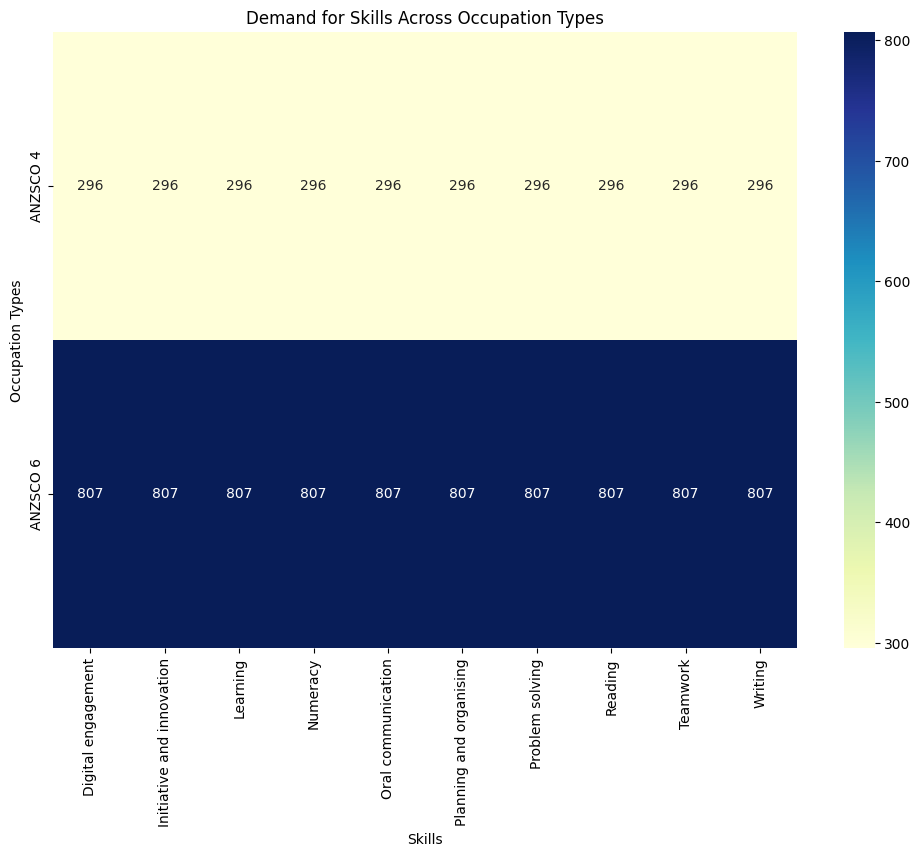

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'core_competencies' contains 'Occupation Type' column instead of 'Industry'
# Group skills by Occupation Type and count frequency
skill_counts_per_industry = core_competencies.groupby(['Occupation Type', 'Core Competency']).size().unstack(fill_value=0)

# Plot the demand for different skills across industries
plt.figure(figsize=(12, 8))
sns.heatmap(skill_counts_per_industry, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Demand for Skills Across Occupation Types') # Changed title to reflect Occupation Type
plt.xlabel('Skills')
plt.ylabel('Occupation Types') # Changed ylabel to reflect Occupation Type
plt.show()

## 4.2 Industry Trends

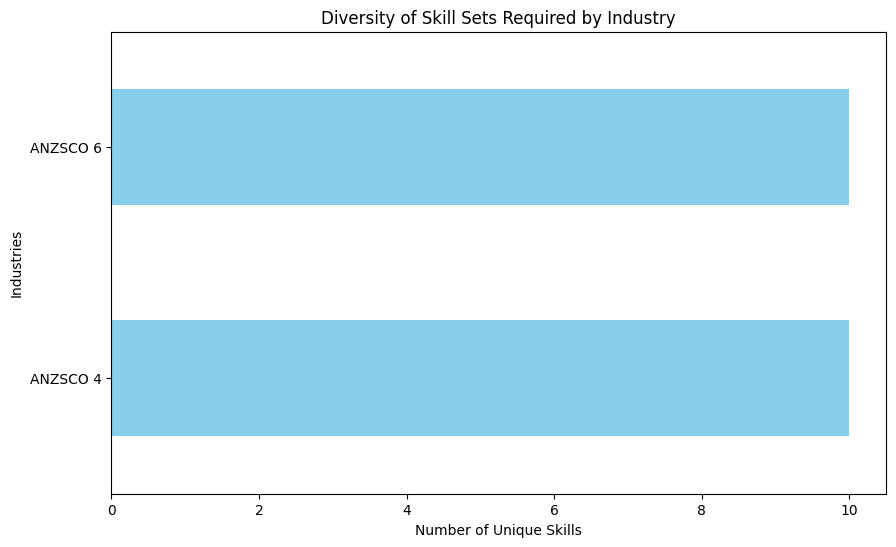

Common Skills Across All Industries: {'Digital engagement', 'Initiative and innovation', 'Oral communication', 'Reading', 'Writing', 'Teamwork', 'Problem solving', 'Learning', 'Numeracy', 'Planning and organising'}
Unique Skills Per Industry:
ANZSCO 4: set()
ANZSCO 6: set()


In [ ]:
# Calculate diversity of skill sets per industry
skill_diversity = skill_counts_per_industry.apply(lambda x: x.gt(0).sum(), axis=1)

# Plotting diversity of skill sets
skill_diversity.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Diversity of Skill Sets Required by Industry')
plt.xlabel('Number of Unique Skills')
plt.ylabel('Industries')
plt.show()

# Identify unique and overlapping skills across industries
from functools import reduce

# Create a set of skills per industry
skills_per_industry = {industry: set(data.dropna().index) for industry, data in skill_counts_per_industry.iterrows()}

# Find common skills across all industries
common_skills = reduce(set.intersection, [set(val) for val in skills_per_industry.values()])
print("Common Skills Across All Industries:", common_skills)

# Find unique skills per industry
unique_skills_per_industry = {industry: skills - set.union(*(s for k, s in skills_per_industry.items() if k != industry))
                              for industry, skills in skills_per_industry.items()}
print("Unique Skills Per Industry:")
for industry, skills in unique_skills_per_industry.items():
    print(f"{industry}: {skills}")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# !python -m spacy download en_core_web_sm

# Import libraries
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install squarify # Install the squarify library

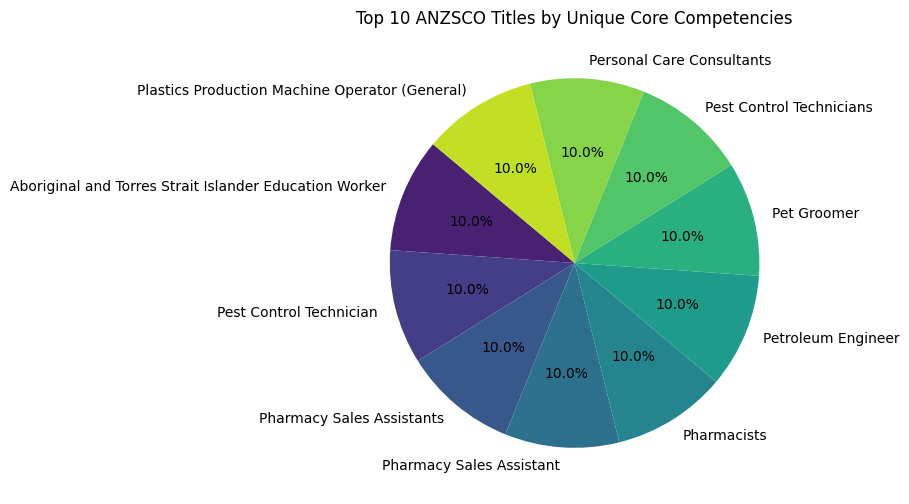

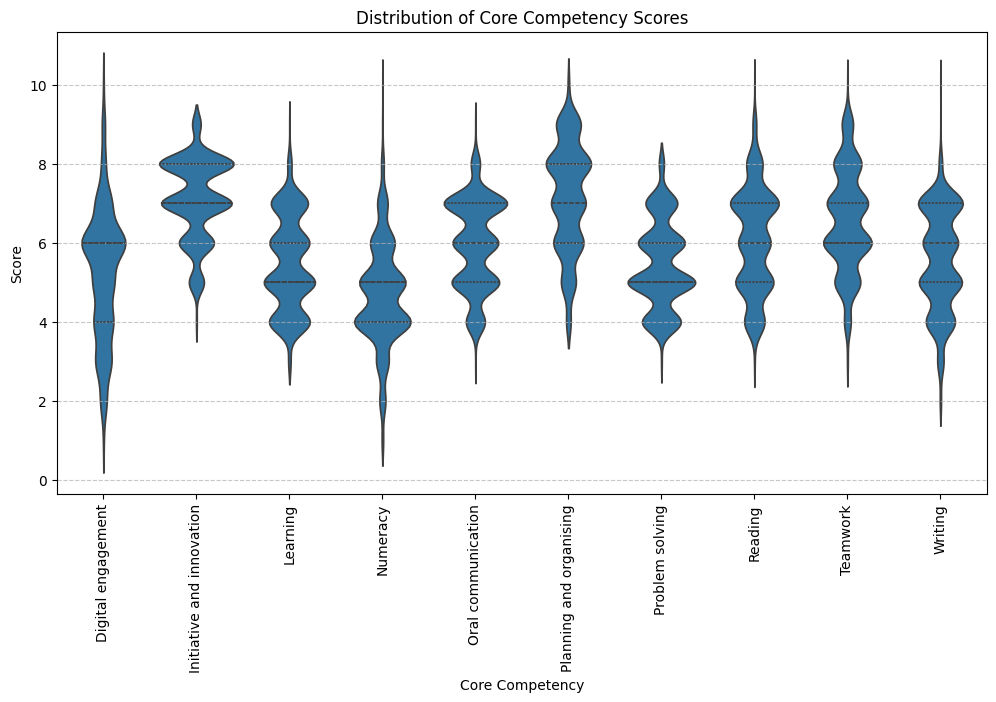

<ipython-input-19-8ebda71a790d>:71: FutureWarning: The provided callable <function mean at 0x7b1242d4ab60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  proficiency_pivot = core_competencies.pivot_table(index="ANZSCO Title", columns="Proficiency Level", values="Score", aggfunc=np.mean)


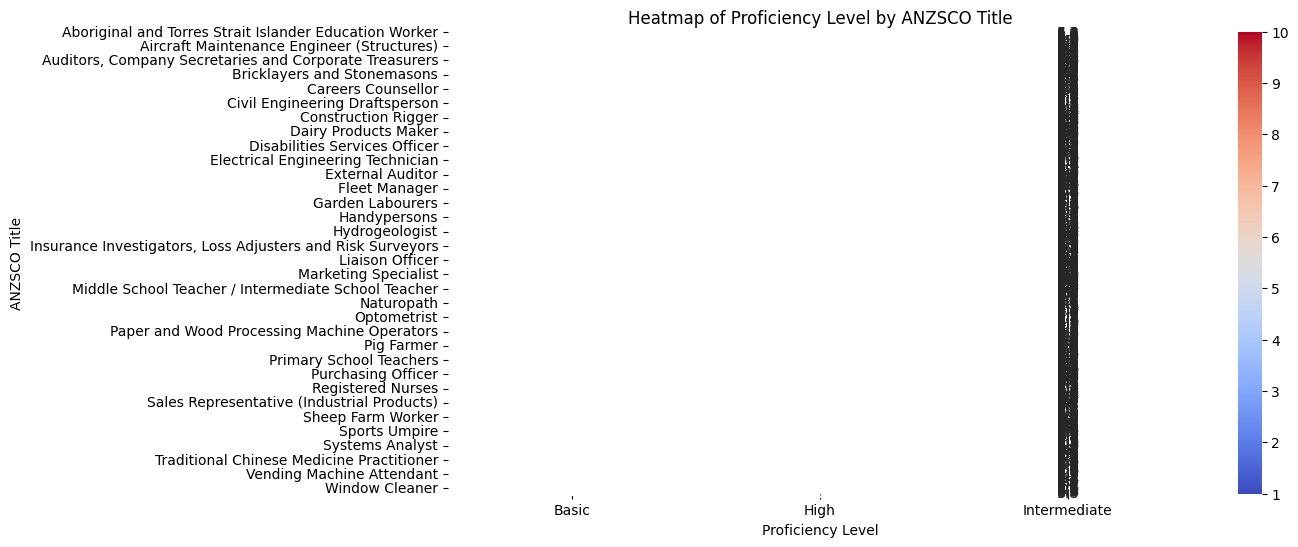

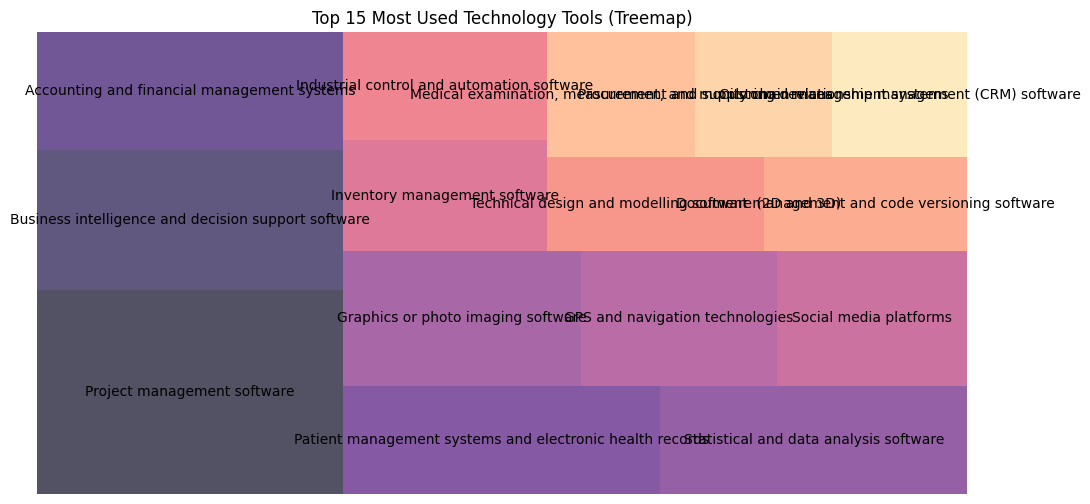

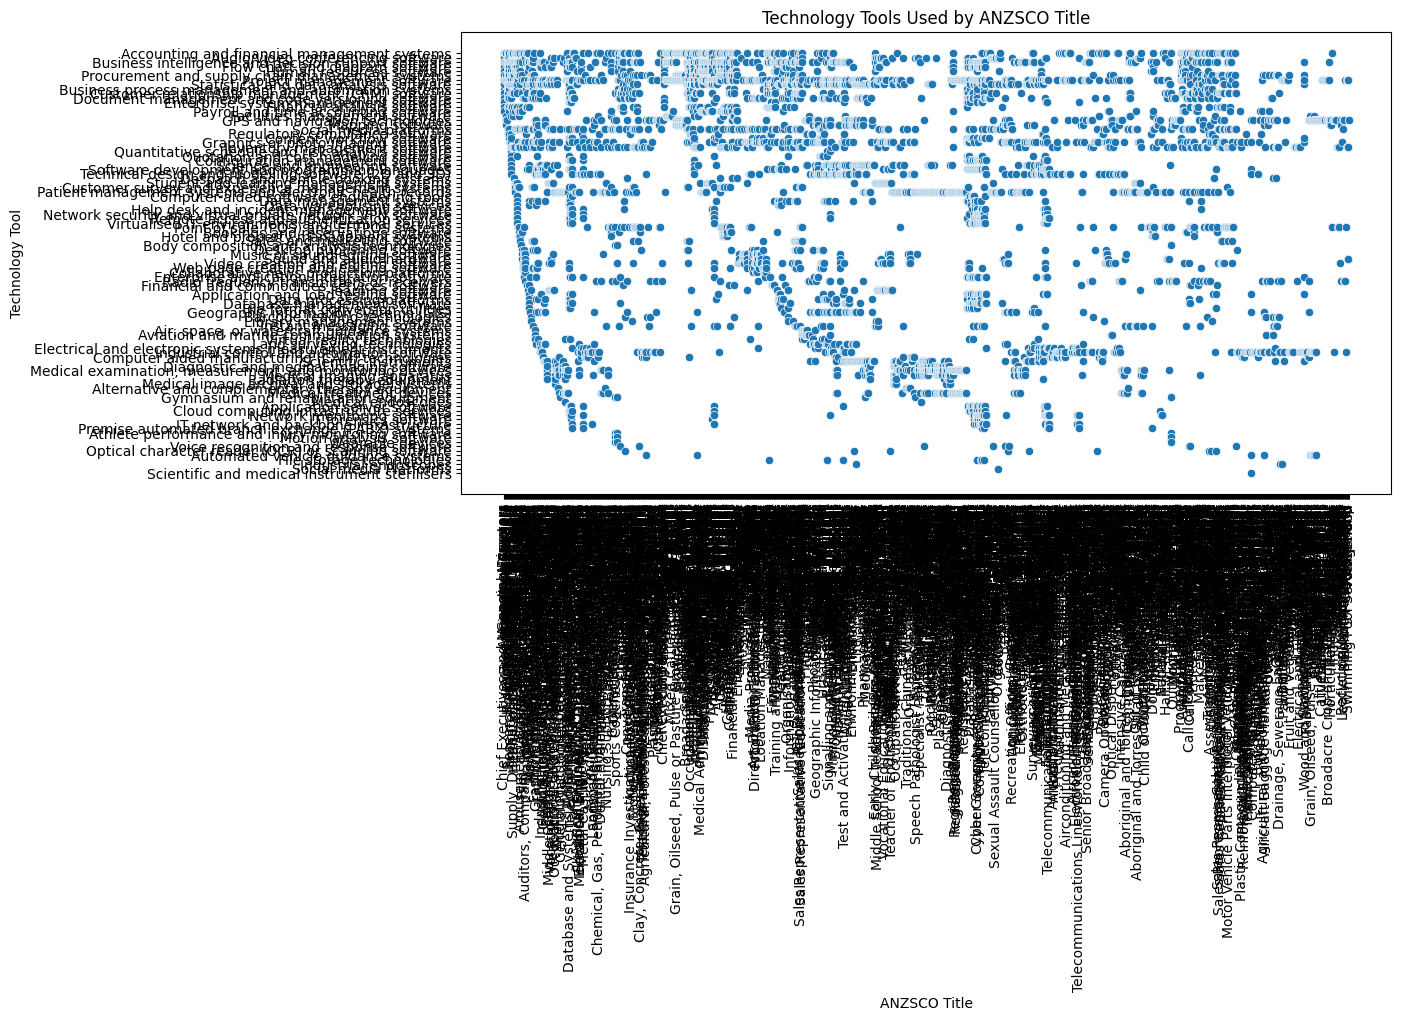

In [ ]:
# prompt: generate those graphs that are given in the code below
# # Count of core competencies per ANZSCO Title
# competency_count = df.groupby("ANZSCO Title")["Core Competency"].nunique().reset_index()
# competency_count.columns = ["ANZSCO Title", "Unique Core Competencies"]
# # Pie Chart for Top 10 ANZSCO Titles by Unique Core Competencies
# plt.figure(figsize=(10, 6))
# top_10_competency = competency_count.sort_values("Unique Core Competencies", ascending=False).head(10)
# plt.pie(top_10_competency["Unique Core Competencies"], labels=top_10_competency["ANZSCO Title"], autopct='%1.1f%%',
#         startangle=140, colors=sns.color_palette("viridis", 10))
# plt.title("Top 10 ANZSCO Titles by Unique Core Competencies")
# plt.show()
# # Violin Plot for Core Competency Scores
# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df, x="Core Competency", y="Score", inner="quartile")
# plt.xticks(rotation=90)
# plt.xlabel("Core Competency")
# plt.ylabel("Score")
# plt.title("Distribution of Core Competency Scores")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()
# # Heatmap for Proficiency Level Analysis
# proficiency_pivot = df.pivot_table(index="ANZSCO Title", columns="Proficiency Level", values="Score", aggfunc=np.mean)
# plt.figure(figsize=(12, 6))
# sns.heatmap(proficiency_pivot, annot=True, cmap="coolwarm", linewidths=0.5)
# plt.xlabel("Proficiency Level")
# plt.ylabel("ANZSCO Title")
# plt.title("Heatmap of Proficiency Level by ANZSCO Title")
# plt.show()
# # Technology Tools Analysis - Treemap
# import squarify
# tech_tool_count = df["Technology Tool"].value_counts().reset_index()
# tech_tool_count.columns = ["Technology Tool", "Count"]
# plt.figure(figsize=(12, 6))
# squarify.plot(sizes=tech_tool_count["Count"].head(15), label=tech_tool_count["Technology Tool"].head(15),
#               alpha=0.7, color=sns.color_palette("magma", 15))
# plt.title("Top 15 Most Used Technology Tools (Treemap)")
# plt.axis("off")
# plt.show()
# # Scatter Plot for Technology Tools by ANZSCO Title
# tool_by_anzsco = df.groupby(["ANZSCO Title", "Tec

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify


competency_count = core_competencies.groupby("ANZSCO Title")["Core Competency"].nunique().reset_index()
competency_count.columns = ["ANZSCO Title", "Unique Core Competencies"]

# Pie Chart for Top 10 ANZSCO Titles by Unique Core Competencies
plt.figure(figsize=(10, 6))
top_10_competency = competency_count.sort_values("Unique Core Competencies", ascending=False).head(10)
plt.pie(top_10_competency["Unique Core Competencies"], labels=top_10_competency["ANZSCO Title"], autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette("viridis", 10))
plt.title("Top 10 ANZSCO Titles by Unique Core Competencies")
plt.show()

# Violin Plot for Core Competency Scores
plt.figure(figsize=(12, 6))
sns.violinplot(data=core_competencies, x="Core Competency", y="Score", inner="quartile")
plt.xticks(rotation=90)
plt.xlabel("Core Competency")
plt.ylabel("Score")
plt.title("Distribution of Core Competency Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap for Proficiency Level Analysis
proficiency_pivot = core_competencies.pivot_table(index="ANZSCO Title", columns="Proficiency Level", values="Score", aggfunc=np.mean)
plt.figure(figsize=(12, 6))
sns.heatmap(proficiency_pivot, annot=True, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Proficiency Level")
plt.ylabel("ANZSCO Title")
plt.title("Heatmap of Proficiency Level by ANZSCO Title")
plt.show()

# Technology Tools Analysis - Treemap
tech_tool_count = tech_tool_count["Technology Tool"].value_counts().reset_index()
tech_tool_count.columns = ["Technology Tool", "Count"]
plt.figure(figsize=(12, 6))
squarify.plot(sizes=tech_tool_count["Count"].head(15), label=tech_tool_count["Technology Tool"].head(15),
              alpha=0.7, color=sns.color_palette("magma", 15))
plt.title("Top 15 Most Used Technology Tools (Treemap)")
plt.axis("off")
plt.show()

# Assuming "Technology Tool" column exists, otherwise replace with the appropriate column name
# Scatter Plot for Technology Tools by ANZSCO Title
plt.figure(figsize=(12, 6))
# Using the original dataframe 'core_competencies' instead of 'tech_tool_count' to access 'ANZSCO Title'
# Replace 'Technology Tool' with your desired column if it's different
sns.scatterplot(data=sheets_dict['Technology tools'], x="ANZSCO Title", y="Technology Tool")
plt.xticks(rotation=90)
plt.title("Technology Tools Used by ANZSCO Title")
plt.xlabel("ANZSCO Title")
plt.ylabel("Technology Tool")
plt.show()

In [ ]:
print(tech_tool_count.head())

NameError: name 'tech_tool_count' is not defined